<a href="https://colab.research.google.com/github/NKDevi-maker/newone/blob/main/AEROFIT_CASE_STUDY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aerofit Business Case- Analysis and Recommendation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from scipy.stats import binom
import math
from scipy.stats import poisson
from scipy.stats import geom
from scipy.stats import expon

In [ ]:
customer = pd.read_csv("aerofit_treadmill case study.csv")
customer

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


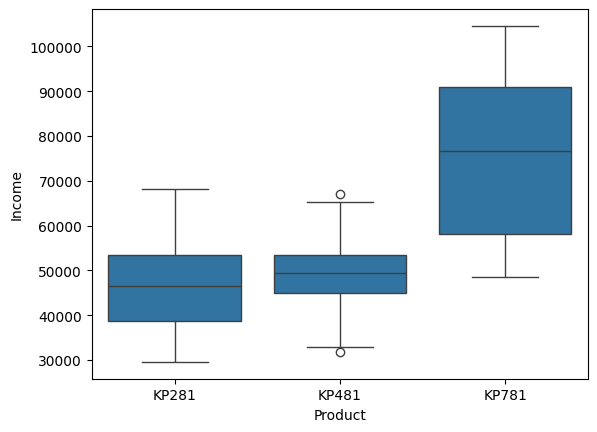

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named customer
sns.boxplot(data=customer, x="Product", y="Income")
plt.show()


In [ ]:
a=pd.crosstab(customer['Gender'],customer['Product'])
a

Product,KP281,KP481,KP781
Gender,,,
Female,40,29,7
Male,40,31,33


ho: product is independent of gender
ha: product is independent of gender 1-beta=0.95 so alpha-0.5
chisqaure only have range [0,infinite] right tail


In [ ]:
from scipy.stats import chi2_contingency
from scipy.stats import chisquare,chi2
chi2_contingency(a)

Chi2ContingencyResult(statistic=12.923836032388664, pvalue=0.0015617972833158714, dof=2, expected_freq=array([[33.77777778, 25.33333333, 16.88888889],
       [46.22222222, 34.66666667, 23.11111111]]))

In [ ]:
1-chi2.cdf(12.923,2)

0.0015624502763438297

In [ ]:
chi2.ppf(0.95,2) # find the critical value

5.991464547107979

# here ,critial value is 5.99 and stats value=12.93 5.99  < 12.93 so reject null hypothesis  ,conclusion: product is  dependent of gender

In [ ]:
observed = [[67,213,74], [411,633,129], [85,51,7], [27,60,15]]
test_statistic, p_value, dof, expected_values = chi2_contingency(observed)
test_statistic, p_value, dof, expected_values

(94.26880078578765,
 3.925170647869838e-18,
 6,
 array([[117.86681716, 191.18397291,  44.94920993],
        [390.55869074, 633.49943567, 148.94187359],
        [ 47.61286682,  77.22968397,  18.15744921],
        [ 33.96162528,  55.08690745,  12.95146727]]))

In [ ]:
1-chi2.cdf(94.

0.0

In [ ]:
customer['random_group']=np.random.choice(['g1','g2','g3'],size=len(customer))
customer

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,random_group
0,KP281,18,Male,14,Single,3,4,29562,112,g1
1,KP281,19,Male,15,Single,2,3,31836,75,g2
2,KP281,19,Female,14,Partnered,4,3,30699,66,g1
3,KP281,19,Male,12,Single,3,3,32973,85,g2
4,KP281,20,Male,13,Partnered,4,2,35247,47,g2
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,g1
176,KP781,42,Male,18,Single,5,4,89641,200,g2
177,KP781,45,Male,16,Single,5,5,90886,160,g1
178,KP781,47,Male,18,Partnered,4,5,104581,120,g2


In [ ]:
customer.groupby('random_group')['Income'].mean()

random_group
g1    52120.666667
g2    52887.016949
g3    56097.540984
Name: Income, dtype: float64

In [ ]:
income_g1=customer[customer['random_group']== 'g1']
income_g2=customer[customer['random_group']== 'g2']
income_g3=customer[customer['random_group']== 'g3']

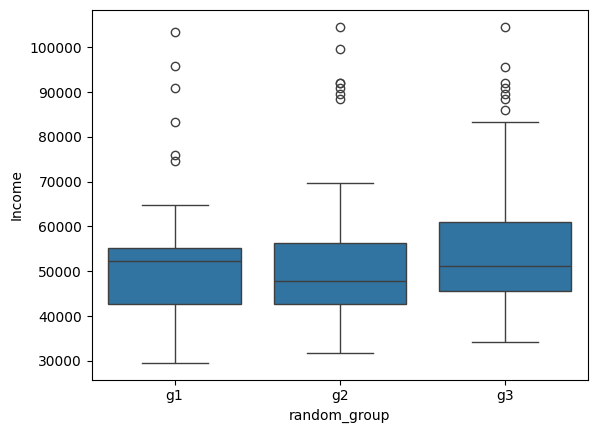

In [ ]:

sns.boxplot(data=customer, y="Income", x="random_group")
plt.show()

In [ ]:
customer['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [ ]:
bins = [20000, 45000, 60000, 80000, 90000, 110000]
group = ['low', 'm1', 'm2', 'h1','h2']

# Create the 'income_range' column using pd.cut()
customer['income_range'] = pd.cut(customer['Income'], bins=bins, labels=group)

In [ ]:
customer['random_group'].value_counts()

random_group
g3    61
g1    60
g2    59
Name: count, dtype: int64

In [ ]:
pd.crosstab(customer['Product'],customer['income_range'])

income_range,low,m1,m2,h1,h2
Product,,,,,
KP281,34,40,6,0,0
KP481,15,38,7,0,0
KP781,0,11,10,7,12


In [ ]:
import pandas as pd

# Assuming you have a DataFrame named 'customer' with columns 'Product' and 'income_range'
result = pd.crosstab(customer['Product'], customer['income_range'],margins=True, margins_name='Total')
result

income_range,low,m1,m2,h1,h2,Total
Product,,,,,,
KP281,34,40,6,0,0,80
KP481,15,38,7,0,0,60
KP781,0,11,10,7,12,40
Total,49,89,23,7,12,180


In [ ]:
34/49,49/180,80/180,60/180.49/180

(0.6938775510204082,
 0.2722222222222222,
 0.4444444444444444,
 0.0018468243854691856)

In [ ]:
b=pd.crosstab(customer['Product'],customer['income_range'],normalize='columns',margins=True, margins_name='Total')
b

income_range,low,m1,m2,h1,h2,Total
Product,,,,,,
KP281,0.693878,0.449438,0.260870,0.0,0.0,0.444444
KP481,0.306122,0.426966,0.304348,0.0,0.0,0.333333
KP781,0.000000,0.123596,0.434783,1.0,1.0,0.222222


In [ ]:
a=pd.crosstab(customer['income_range'],customer['Product'],normalize="index",margins=True, margins_name='Total')
a

Product,KP281,KP481,KP781
income_range,,,
low,0.693878,0.306122,0.000000
m1,0.449438,0.426966,0.123596
m2,0.260870,0.304348,0.434783
h1,0.000000,0.000000,1.000000
h2,0.000000,0.000000,1.000000
Total,0.444444,0.333333,0.222222


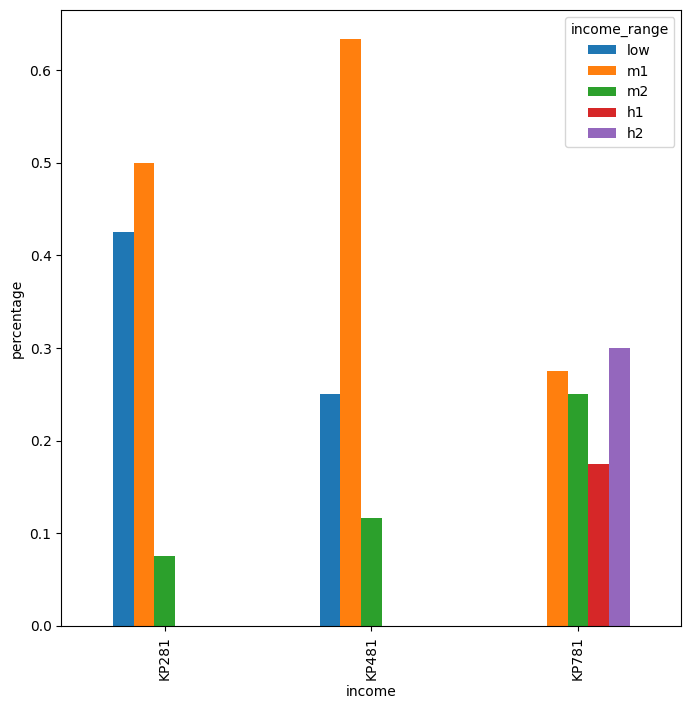

In [ ]:
k=pd.crosstab(customer['Product'],customer['income_range'],normalize="index")
k.plot(kind="bar",figsize=(8,8))
plt.xlabel('income')
plt.ylabel('percentage')
plt.show()

In [ ]:
val=pd.crosstab(index=customer['income_range'],columns=customer['Product']).values
print(val)

[[34 15  0]
 [40 38 11]
 [ 6  7 10]
 [ 0  0  7]
 [ 0  0 12]]


In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(val)

Chi2ContingencyResult(statistic=97.07697676041596, pvalue=1.687396165849618e-17, dof=8, expected_freq=array([[21.77777778, 16.33333333, 10.88888889],
       [39.55555556, 29.66666667, 19.77777778],
       [10.22222222,  7.66666667,  5.11111111],
       [ 3.11111111,  2.33333333,  1.55555556],
       [ 5.33333333,  4.        ,  2.66666667]]))

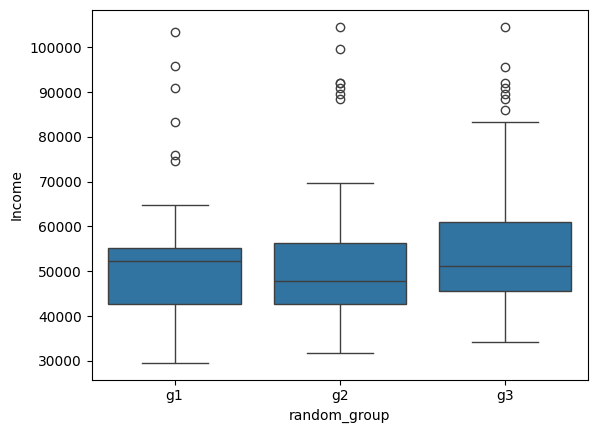

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named customer
sns.boxplot(data=customer, x="random_group", y="Income")
plt.show()

The data type of all columns in the “customers” table.

In [ ]:
customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [ ]:
customer.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,KP281,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


**insight:**
The given dataset has 180 rows and 9 columns

There are no Null values in the given aerofit dataset.

#1.find the number of rows and columns given in the dataset,We want you to find the shape of the dataset.

In [ ]:
#data type of all columns in the “customers” table.
print(customer.dtypes)
num_rows, num_cols = customer.shape
dimension=customer.ndim
print(f"customer shape")
print("Number of rows:", num_rows)
print("Number of columns:", num_cols)
print("dimension of the customer dataset is:",dimension)

Product          object
Age               int64
Gender           object
Education         int64
MaritalStatus    object
Usage             int64
Fitness           int64
Income            int64
Miles             int64
dtype: object
customer shape
Number of rows: 180
Number of columns: 9
dimension of the customer dataset is: 2


In [ ]:
# Check for missing values and find the number of missing values in each column
missing_values = customer.isna().sum()
print("Number of missing values in each column:")
print(missing_values)

Number of missing values in each column:
Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64


# 2.Detect Outliers

# 2a.Remove/clip the data between the 5 percentile and 95 percentile,We want You to use np.clip() for clipping the data

In [ ]:
continuous_vars = ['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']
for var in continuous_vars:
    lower_bound = np.percentile(customer[var], 5)  # 5th percentile
    upper_bound = np.percentile(customer[var], 95)
    print(f"{var}: Lower bound = {lower_bound}, Upper bound = {upper_bound}")
    customer[var] = np.clip(customer[var], lower_bound, upper_bound)
print("Dataset after clipping:")
print(customer.head())

Age: Lower bound = 20.0, Upper bound = 43.0025
Education: Lower bound = 14.0, Upper bound = 18.0
Usage: Lower bound = 2.0, Upper bound = 5.002499999999999
Income: Lower bound = 34107.1575, Upper bound = 90889.1125
Fitness: Lower bound = 2.0, Upper bound = 5.0
Miles: Lower bound = 47.0, Upper bound = 200.0
Dataset after clipping:
  Product   Age  Gender  Education MaritalStatus  Usage  Fitness      Income  \
0   KP281  20.0    Male         14        Single    3.0        4  34107.1575   
1   KP281  20.0    Male         15        Single    2.0        3  34107.1575   
2   KP281  20.0  Female         14     Partnered    4.0        3  34107.1575   
3   KP281  20.0    Male         14        Single    3.0        3  34107.1575   
4   KP281  20.0    Male         14     Partnered    4.0        2  35247.0000   

   Miles  
0    112  
1     75  
2     66  
3     85  
4     47  


The dataset now contains values within the 5th and 95th percentiles for each continuous variable, ensuring a more consistent and reliable dataset for analysis.

# 2.Find the outliers for every continuous variable in the dataset ,We want you to use boxplots to find the outliers in the given dataset

<ipython-input-10-383307b66a1e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer,x="Product",y=continuous_vars[count],ax=axs[i,j],palette="Set3")
<ipython-input-10-383307b66a1e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer,x="Product",y=continuous_vars[count],ax=axs[i,j],palette="Set3")
<ipython-input-10-383307b66a1e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=customer,x="Product",y=continuous_vars[count],ax=axs[i,j],palette="Set3")
<ipython-input-10-383307b66a1e>:8: FutureWarning: 

Passing `palett

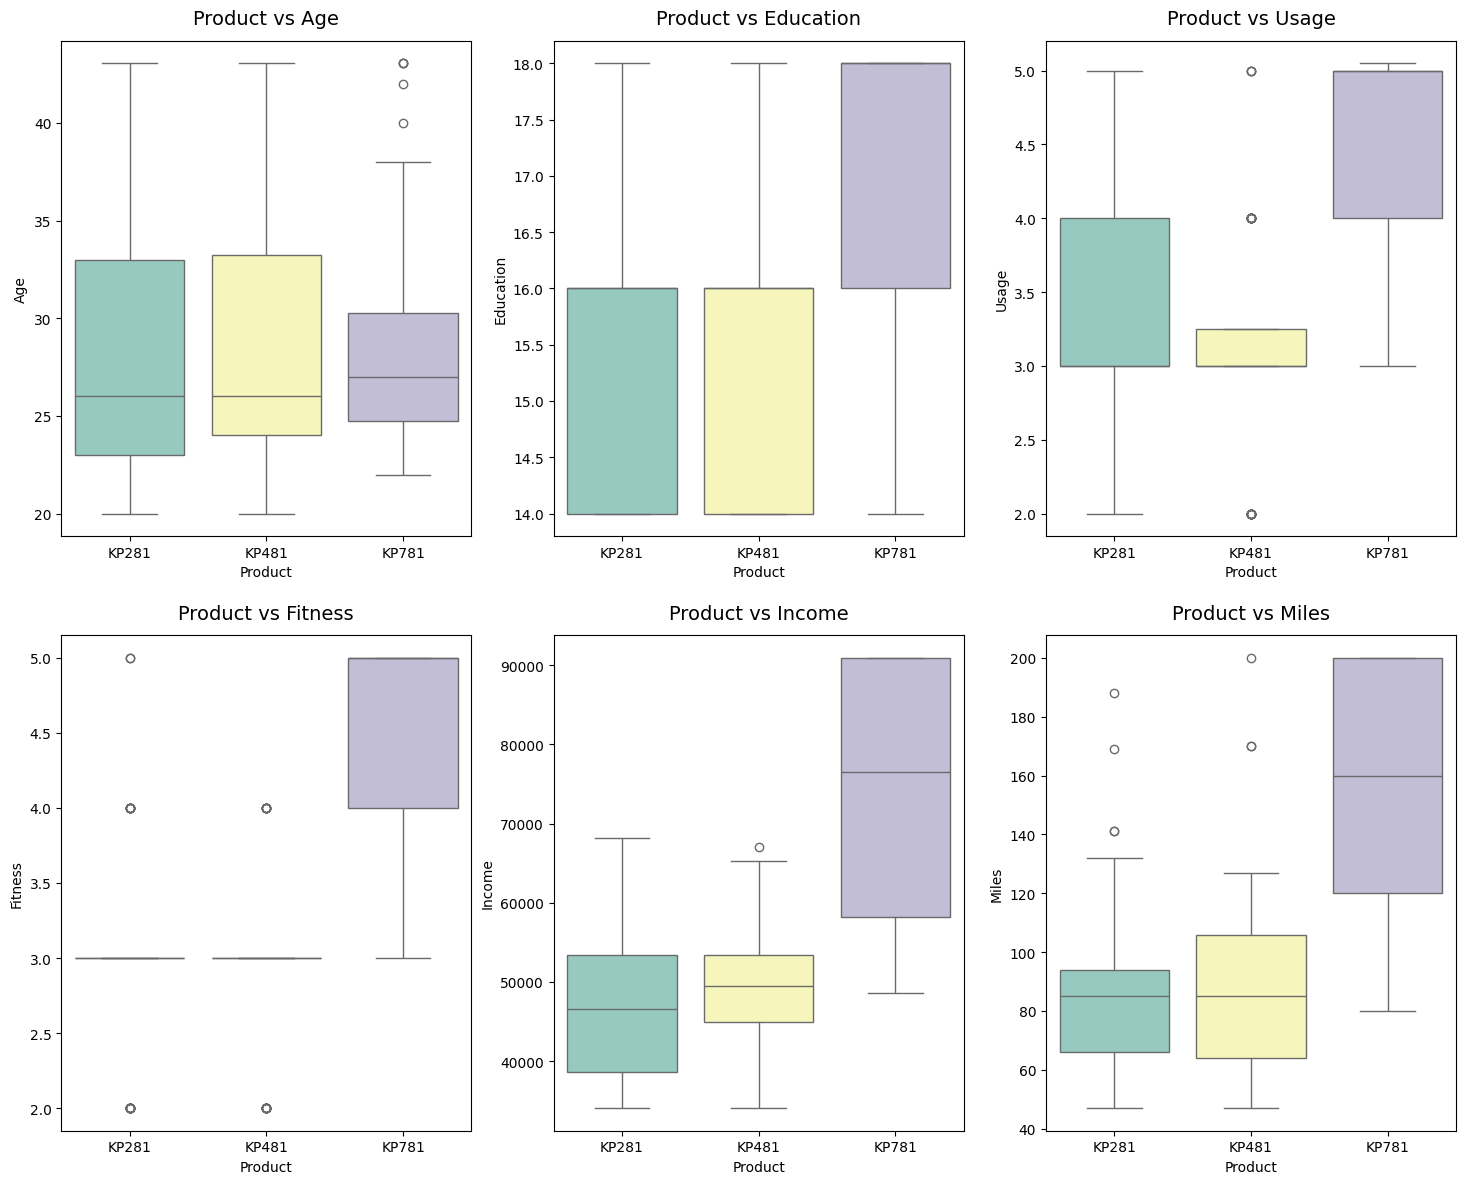

In [ ]:
# Select only the continuous variables for outlier detection
continuous_vars = ["Age","Education","Usage","Fitness","Income","Miles"]
fig,axs = plt.subplots(nrows = 2,ncols = 3,figsize = (18,10))
fig.subplots_adjust(top=1.2)
count=0
for i in range(2) :
    for j in range(3) :
      sns.boxplot(data=customer,x="Product",y=continuous_vars[count],ax=axs[i,j],palette="Set3")
      axs[i,j].set_title(f"Product vs {continuous_vars[count]}",pad=12,fontsize=14)
      count+=1

plt.show()


Explation of boxplot and Mention the outlier of all all the continuous variable in the customer dataset

In [ ]:
continuous_vars = ['Age', 'Education', 'Usage', 'Income', 'Fitness', 'Miles']

# Loop through each continuous variable
for var in continuous_vars:
    # Select the column data
    column_data = customer[var]

    # Calculate quartiles
    Q1 = np.percentile(column_data, 25)
    Q3 = np.percentile(column_data, 75)

    # Calculate interquartile range (IQR)
    IQR = Q3 - Q1

    # Determine lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count outliers below the lower bound and above the upper bound
    num_outliers_below = sum(column_data < lower_bound)
    num_outliers_above = sum(column_data > upper_bound)

    # Print the summary for each column
    print(f"{var} Column Details:")
    print(f"Q1: {Q1}")
    print(f"Q3: {Q3}")
    print(f"IQR: {IQR}")
    print(f"Lower Bound: {lower_bound}")
    print(f"Upper Bound: {upper_bound}")
    print(f"Number of Outliers below lower bound: {num_outliers_below}")
    print(f"Number of Outliers above upper bound: {num_outliers_above}")
    print()

Age Column Details:
Q1: 24.0
Q3: 33.0
IQR: 9.0
Lower Bound: 10.5
Upper Bound: 46.5
Number of Outliers below lower bound: 0
Number of Outliers above upper bound: 0

Education Column Details:
Q1: 14.0
Q3: 16.0
IQR: 2.0
Lower Bound: 11.0
Upper Bound: 19.0
Number of Outliers below lower bound: 0
Number of Outliers above upper bound: 0

Usage Column Details:
Q1: 3.0
Q3: 4.0
IQR: 1.0
Lower Bound: 1.5
Upper Bound: 5.5
Number of Outliers below lower bound: 0
Number of Outliers above upper bound: 0

Income Column Details:
Q1: 44058.75
Q3: 58668.0
IQR: 14609.25
Lower Bound: 22144.875
Upper Bound: 80581.875
Number of Outliers below lower bound: 0
Number of Outliers above upper bound: 19

Fitness Column Details:
Q1: 3.0
Q3: 4.0
IQR: 1.0
Lower Bound: 1.5
Upper Bound: 5.5
Number of Outliers below lower bound: 0
Number of Outliers above upper bound: 0

Miles Column Details:
Q1: 66.0
Q3: 114.75
IQR: 48.75
Lower Bound: -7.125
Upper Bound: 187.875
Number of Outliers below lower bound: 0
Number of Outlie

# 3a. Find if there is any relationship between the categorical variables and the output variable in the data.using countplot
]


<Axes: xlabel='Gender', ylabel='count'>

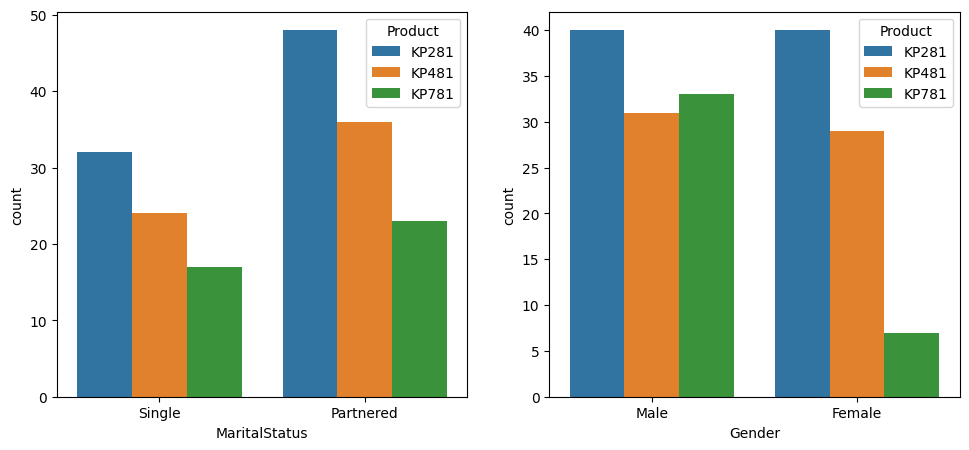

In [ ]:
# Create count plots for marital status, gender, product purchased
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.countplot(x='MaritalStatus', hue='Product', data=customer)

plt.subplot(1, 3, 2)
sns.countplot(x='Gender', hue='Product', data=customer)


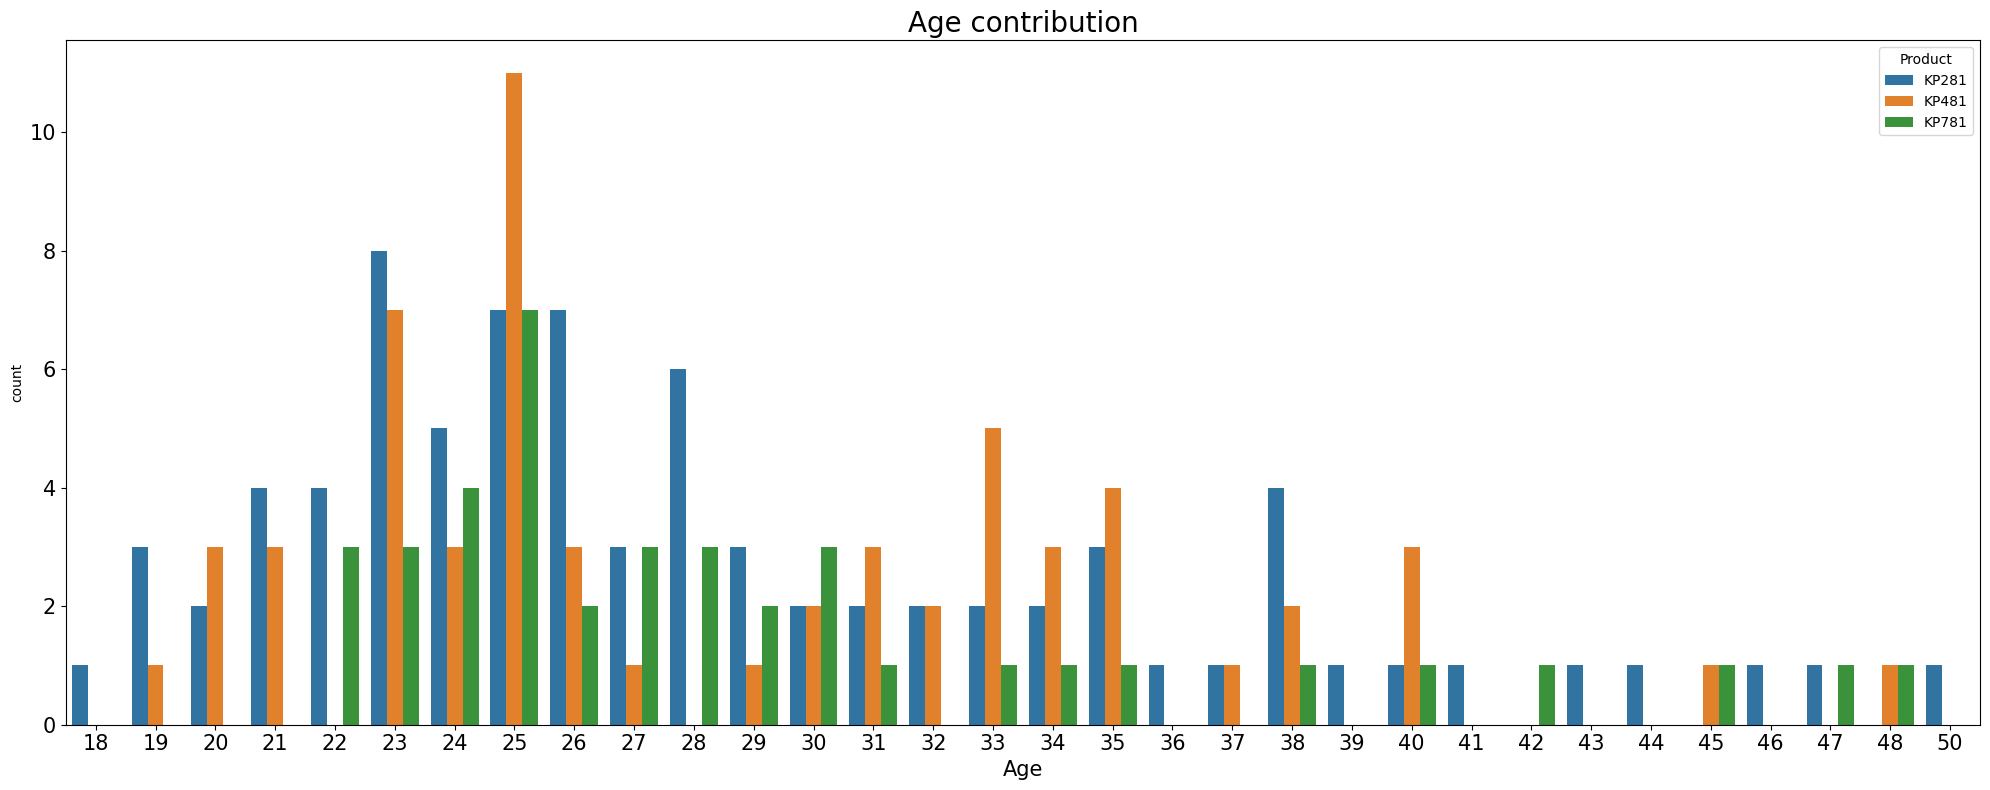

In [ ]:
# Create count plots for age contribution product purchased
plt.figure(figsize=(20, 8))
sns.countplot(x='Age', hue='Product', data=customer)
plt.title('Age contribution', fontsize=20); plt.xlabel("Age", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()
plt.show()

# 3b.  Find if there is any relationship between the continuous variables and the output variable in the data. using scatter plot



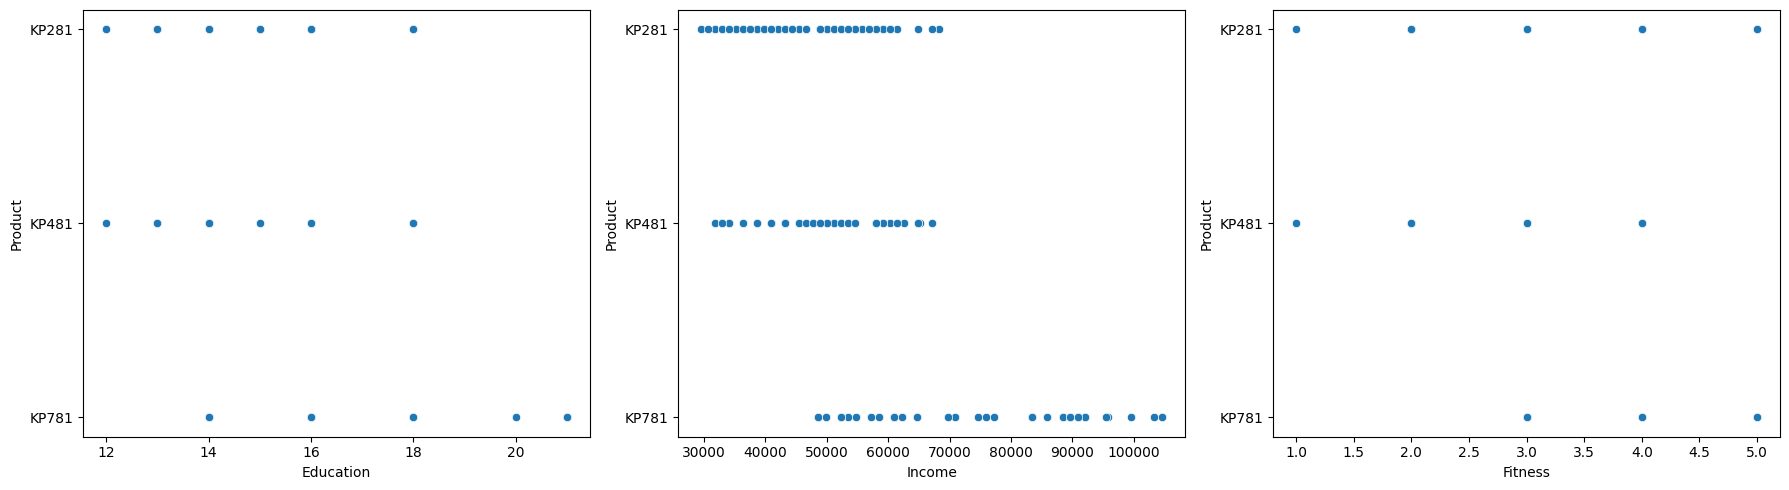

In [ ]:
# Create scatter plots for continuous variables against the product purchased
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Education', y='Product', data=customer)

plt.subplot(1, 3, 2)
sns.scatterplot(x='Income', y='Product', data=customer)

plt.subplot(1, 3, 3)
sns.scatterplot(x='Fitness', y='Product', data=customer)


plt.tight_layout()
plt.show()


#4a.Find the marginal probability (what percent of customers have purchased KP281, KP481, or KP781)


In [ ]:
# Create a contingency table using crosstab
contingency_table = pd.crosstab(index=customer['Product'], columns='count',margins=True)
marginal_probability=pd.crosstab(index=customer['Product'], columns='count',normalize=True,margins=True)

print(f"contingency_table: {contingency_table}")
print("Marginal Probability of Each Product:")
marginal_probability.reset_index()

contingency_table: col_0    count  All
Product            
KP281       80   80
KP481       60   60
KP781       40   40
All        180  180
Marginal Probability of Each Product:


col_0,Product,count,All
0,KP281,0.444444,0.444444
1,KP481,0.333333,0.333333
2,KP781,0.222222,0.222222
3,All,1.000000,1.000000


#4b. Find the probability that the customer buys a product based on each column.


# 4b. Marginal Probabilty for*** Gender and Product***

In [ ]:
print("Absolute numbers: ")
print(pd.crosstab(index=customer['Gender'],columns=customer['Product'],margins=True))
print("Probability: ")
print(pd.crosstab(index=customer['Gender'],columns=customer['Product'],margins=True, normalize=True))

Absolute numbers: 
Product  KP281  KP481  KP781  All
Gender                           
Female      40     29      7   76
Male        40     31     33  104
All         80     60     40  180
Probability: 
Product     KP281     KP481     KP781       All
Gender                                         
Female   0.222222  0.161111  0.038889  0.422222
Male     0.222222  0.172222  0.183333  0.577778
All      0.444444  0.333333  0.222222  1.000000


P(a male buying a treadmill) = 0.55(approx)

P(a female buying a treadmill) = 0.45(approx)

P(a male buying a KP281) = P(a female buying a KP281) = 0.25(approx)

P(a male buying a KP481) = 0.19 > P(a female buying a KP481) = 0.18

P(a male buying a KP781) = 0.11 >> P(a female buying a 7P281) = 0.03(approx)

P(Customer buying KP281) = 0.5(approx) > P(Customer buying KP481) = 0.37(approx) >> P(Customer buying KP781) = 0.13(approx)

# 4b. Marginal Probabilty for*** Martial status and Product***

In [ ]:
print("Absolute numbers: ")
print(pd.crosstab(index=customer['MaritalStatus'],columns=customer['Product'],margins=True))
print("Probability: ")
print(pd.crosstab(index=customer['MaritalStatus'],columns=customer['Product'],margins=True, normalize=True))

Absolute numbers: 
Product        KP281  KP481  KP781  All
MaritalStatus                          
Partnered         48     36     23  107
Single            32     24     17   73
All               80     60     40  180
Probability: 
Product           KP281     KP481     KP781       All
MaritalStatus                                        
Partnered      0.266667  0.200000  0.127778  0.594444
Single         0.177778  0.133333  0.094444  0.405556
All            0.444444  0.333333  0.222222  1.000000


Notable Probabilities
P( partnered ) =0.58(approx) > P(Single) =0.42(approx)

P(partnered KP781) = P(Single KP781) = 0.06(approx)

P(partnered KP481) = 0.22(approx) > P(Single KP481) = 0.14(approx)

P(partnered KP281) = 0.3(approx) > P(single KP481) = 0.2(approx)

# 4b. Marginal Probabilty for*** Usage and Product***

In [ ]:
print("Absolute numbers:Usage ")
print(pd.crosstab(index=customer['Usage'],columns=customer['Product'],margins=True))
print("Probability:Usage ")
print(pd.crosstab(index=customer['Usage'],columns=customer['Product'],margins=True, normalize=True))

Absolute numbers: 
Product            KP281  KP481  KP781  All
Usage                                      
2.0                   19     14      0   33
3.0                   37     31      1   69
4.0                   22     12     18   52
5.0                    2      3     12   17
5.049999999999983      0      0      9    9
All                   80     60     40  180
Probability: 
Product               KP281     KP481     KP781       All
Usage                                                    
2.0                0.105556  0.077778  0.000000  0.183333
3.0                0.205556  0.172222  0.005556  0.383333
4.0                0.122222  0.066667  0.100000  0.288889
5.0                0.011111  0.016667  0.066667  0.094444
5.049999999999983  0.000000  0.000000  0.050000  0.050000
All                0.444444  0.333333  0.222222  1.000000


# Notable Probabilities: Usage
P( 3 hours of usage and buying a treadmill) =0.42(approx) > P 4 hours) =0.28(approx) > P(2 hours ) =0.2(approx)>P(7 hours ) =0.006(approx)

P( 4 hours KP781) =0.07(approx) > P(5 hours KP781) = 0.04(approx)

P(3 hours KP481) = 0.19 > P(2 hours KP481) = 0.09(approx)

P(3 hours  KP281) = 0.22 > P( 4 hours KP281) = 0.14(approx)

P( 3 hours KP781) = 0.09 > P(4 hours KP281) =0.01(approx)>P(2 hours KP281)= 0.12

# 4b. Marginal Probabilty for*** Fitness and Product***

In [ ]:
print("Absolute numbers:Fitness ")
print(pd.crosstab(index=customer['Fitness'],columns=customer['Product'],margins=True))
print("Probability:Fitness")
print(pd.crosstab(index=customer['Fitness'],columns=customer['Product'],margins=True, normalize=True))

Absolute numbers:Fitness 
Product  KP281  KP481  KP781  All
Fitness                          
2           15     13      0   28
3           54     39      4   97
4            9      8      7   24
5            2      0     29   31
All         80     60     40  180
Probability:Fitness
Product     KP281     KP481     KP781       All
Fitness                                        
2        0.083333  0.072222  0.000000  0.155556
3        0.300000  0.216667  0.022222  0.538889
4        0.050000  0.044444  0.038889  0.133333
5        0.011111  0.000000  0.161111  0.172222
All      0.444444  0.333333  0.222222  1.000000


#Notable Probabilities:Fitness

P(level 3 of fitness and buying a treadmill) =0.6(approx)

P(level 1 of fitness and buying a treadmill) =0.01(approx)

P(level 5 of fitness KP781) = 0.09(approx)>> P(level 4 of  KP781) = 0.02(approx)

P(level 3 of KP481) = 0.24 >> P(level 2 of KP481) = 0.07(approx)

P(level 3 of KP281) = 0.34 >> P( level 2 of KP281) = 0.09(approx)

P( of  KP781) = 0.09 >> P(level 5 ofKP281) = 0.01(approx)

 # 4b. Marginal Probabilty for*** Education and Product***

In [ ]:
print("Absolute numbers:Education ")
print(pd.crosstab(index=customer['Education'],columns=customer['Product'],margins=True))
print("Probability:Education ")
print(pd.crosstab(index=customer['Education'],columns=customer['Product'],margins=True, normalize=True))

Absolute numbers:Education 
Product    KP281  KP481  KP781  All
Education                          
14            35     26      2   63
15             4      1      0    5
16            39     31     15   85
18             2      2     23   27
All           80     60     40  180
Probability:Education 
Product       KP281     KP481     KP781       All
Education                                        
14         0.194444  0.144444  0.011111  0.350000
15         0.022222  0.005556  0.000000  0.027778
16         0.216667  0.172222  0.083333  0.472222
18         0.011111  0.011111  0.127778  0.150000
All        0.444444  0.333333  0.222222  1.000000


# Notable Probabilities:Education
P(customer with 20 years of education and buying a treadmill) = P(customer with 21 years of education and buying a treadmill) =0.006(approx)

P(16 years of education ) = 0.49(approx)

P( 14 years of education) = 0.34(approx)

P(16 years of education=KP781) = P(18 years of education KP781) = 0.056(approx)

P( 16 years education KP481) =0.19 > P(14 years education KP481) = 0.14(approx)

#P(16 years education KP0281) =0.24 > P( 14 years education KP281) = 0.19(approx)

 # 4b. Marginal Probabilty for*** Income and Product***

In [ ]:
bin1=[20000,30000,40000,50000,60000,70000,80000]
bin2=[20000,30000,40000,50000,60000,70000,80000]

print("Absolute numbers: Income")
print(pd.crosstab(index=pd.cut(customer["Income"],bin1,include_lowest=True,right=True),columns=customer['Product'],margins=True))
print()
print("Probability: Income")
print(pd.crosstab(index=pd.cut(customer["Income"],bin2,include_lowest=True,right=True),columns=customer['Product'],margins=True, normalize=True))

Absolute numbers: Income
Product             KP281  KP481  KP781  All
Income                                      
(30000.0, 40000.0]     23      9      0   32
(40000.0, 50000.0]     25     21      5   51
(50000.0, 60000.0]     26     23      6   55
(60000.0, 70000.0]      6      7      6   19
(70000.0, 80000.0]      0      0      4    4
All                    80     60     21  161

Probability: Income
Product                KP281     KP481     KP781       All
Income                                                    
(30000.0, 40000.0]  0.142857  0.055901  0.000000  0.198758
(40000.0, 50000.0]  0.155280  0.130435  0.031056  0.316770
(50000.0, 60000.0]  0.161491  0.142857  0.037267  0.341615
(60000.0, 70000.0]  0.037267  0.043478  0.037267  0.118012
(70000.0, 80000.0]  0.000000  0.000000  0.024845  0.024845
All                 0.496894  0.372671  0.130435  1.000000


# Notable Probabilities: Income
P(income range of 50k-60k ) =0.34(approx) > P(40k-50k) =0.32(approx)

P( 50k-60k=KP781) = 0.04(approx) >> P(40k-50k=KP781) = 0.03(approx)

P( 50k-60k=KP481) = 0.14 > P( 40k-50k= KP481) = 0.03(approx)

P(50k-60k = KP281)=0.161 > P(40k-50k =KP281)=0.155(approx)>P(30k-40k KP281)=0.14

# 4b. Marginal Probabilty for*** Age and Product***

In [ ]:
# Marginal Probabilty for Age Range  and Product
bin1=[15,25,35,45,55]
print("Absolute numbers: Age")
print(pd.crosstab(index=pd.cut(customer["Age"],bin1,include_lowest=True,right=True),columns=customer['Product'],margins=True))
print("Probability: Age")
print(pd.crosstab(index=pd.cut(customer["Age"],bin1,include_lowest=True,right=True),columns=customer['Product'],margins=True, normalize=True))

Absolute numbers: Age
Product         KP281  KP481  KP781  All
Age                                     
(14.999, 25.0]     34     28     17   79
(25.0, 35.0]       32     24     17   73
(35.0, 45.0]       14      8      6   28
All                80     60     40  180
Probability: Age
Product            KP281     KP481     KP781       All
Age                                                   
(14.999, 25.0]  0.188889  0.155556  0.094444  0.438889
(25.0, 35.0]    0.177778  0.133333  0.094444  0.405556
(35.0, 45.0]    0.077778  0.044444  0.033333  0.155556
All             0.444444  0.333333  0.222222  1.000000


# Notable Probabilities:Age
P(age range of 15-25 ) =0.49(approx) > P(age range of 25-35treadmill) =0.37(approx) >> P(age range of 35-45 ) =0.11(approx)

P(age range of 15-25 KP781) = 0.11(approx) >> P( age range of 25-35 a KP781) = 0.02(approx)

P(age range of 15-25 = KP481) = 0.17 > P(age range of 15-25=KP481) = 0.15(approx)

#P(age range of 15-25= KP281) = 0.21 > P(age range of 15-25 = KP281) = 0.2(approx)

 # 4c.Find the conditional probability that an event occurs given that another event has occurred. (Example: given that a customer is female, what is the probability she’ll purchase a KP481)

# 4c.Conditional Probabilty for Gender and Product

In [ ]:
print("P(Product|Gender): ")
print(pd.crosstab(index=customer['Gender'],columns=customer['Product'],margins=True, normalize="index"))
print("P(Gender|Product): ")
print(pd.crosstab(index=customer['Gender'],columns=customer['Product'],margins=True, normalize="columns"))

P(Product|Gender): 
Product     KP281     KP481     KP781
Gender                               
Female   0.526316  0.381579  0.092105
Male     0.384615  0.298077  0.317308
All      0.444444  0.333333  0.222222
P(Gender|Product): 
Product  KP281     KP481  KP781       All
Gender                                   
Female     0.5  0.483333  0.175  0.422222
Male       0.5  0.516667  0.825  0.577778


#Notable Probabilities:product vs Gender
P(Gender="Male"|Product = "KP281") = P(Gender="Female"|Product = "KP281") = 0.5

P(Gender="Male"|Product = "KP481") = 0.52 > P(Gender="Female"|Product = "KP481") = 0.48

P(Gender="Male"|Product = "KP781") = 0.81 >> P(Gender="Female"|Product = "K781") = 0.19

P(Product = "KP281" | Gender="Male") = 0.55 > P(Product = "KP281"| Gender="Female") = 0.45

P(Product = "KP481" | Gender="Male") = 0.35 < P(Product = "KP481"| Gender="Female") = 0.39

P(Product = "KP781" | Gender="Male") = 0.19 > P(Product = "KP781"| Gender="Female") = 0.05

# 4c.Conditional Probabilty for Marital Status and Product

In [ ]:
print("P(Product|MaritalStatus): ")
print(pd.crosstab(index=customer['MaritalStatus'],columns=customer['Product'],margins=True, normalize="index"))
print("P(MaritalStatus|Product): ")
print(pd.crosstab(index=customer['MaritalStatus'],columns=customer['Product'],margins=True, normalize="columns"))

P(Product|MaritalStatus): 
Product           KP281     KP481     KP781
MaritalStatus                              
Partnered      0.448598  0.336449  0.214953
Single         0.438356  0.328767  0.232877
All            0.444444  0.333333  0.222222
P(MaritalStatus|Product): 
Product        KP281  KP481  KP781       All
MaritalStatus                               
Partnered        0.6    0.6  0.575  0.594444
Single           0.4    0.4  0.425  0.405556


# Notable Probabilities:Product vs Marital Status
P("KP281"| MaritalStatus="Partnered") = 0.51 > P("KP281"| MaritalStatus="Single") = 0.47

P(KP481"| MaritalStatus="Partnered") = 0.38 > P("KP481"| MaritalStatus="Single") = 0.36

P( "KP781"| MaritalStatus="Single") = 0.16 > P("KP781"| MaritalStatus="Partnered") = 0.13

#4c. Conditional Probabilty for Fitness and Product

In [ ]:
print("P(Product|Fitness): ")
print(pd.crosstab(index=customer['Fitness'],columns=customer['Product'],margins=True, normalize="index"))
print("P(Fitness|Product): ")
print(pd.crosstab(index=customer['Fitness'],columns=customer['Product'],margins=True, normalize="columns"))

P(Product|Fitness): 
Product     KP281     KP481     KP781
Fitness                              
2        0.535714  0.464286  0.000000
3        0.556701  0.402062  0.041237
4        0.375000  0.333333  0.291667
5        0.064516  0.000000  0.935484
All      0.444444  0.333333  0.222222
P(Fitness|Product): 
Product   KP281     KP481  KP781       All
Fitness                                   
2        0.1875  0.216667  0.000  0.155556
3        0.6750  0.650000  0.100  0.538889
4        0.1125  0.133333  0.175  0.133333
5        0.0250  0.000000  0.725  0.172222


# Notable Probabilities:Product vs Fitness
P("KP281"| Fitness="3") = 0.56 > P( "KP281"| Fitness="2") = 0.53

P("KP481"| Fitness="1") = 0.5 > P("KP481"| Fitness="2") = 0.46 > P("KP481"| Fitness="3") = 0.41

P("KP781"| Fitness="5") = 0.88 >> P( "KP781"| Fitness="4") = 0.19

# 4c.Conditional Probabilty for Usage and Product

In [ ]:
print("P(Product|Usage): ")
print(pd.crosstab(index=customer['Usage'],columns=customer['Product'], normalize="index"))
print()
print("P(Usage|Product): ")
print(pd.crosstab(index=customer['Usage'],columns=customer['Product'], normalize="columns"))

P(Product|Usage): 
Product     KP281     KP481     KP781
Usage                                
2.00     0.575758  0.424242  0.000000
3.00     0.536232  0.449275  0.014493
4.00     0.423077  0.230769  0.346154
5.00     0.117647  0.176471  0.705882
5.05     0.000000  0.000000  1.000000

P(Usage|Product): 
Product   KP281     KP481  KP781
Usage                           
2.00     0.2375  0.233333  0.000
3.00     0.4625  0.516667  0.025
4.00     0.2750  0.200000  0.450
5.00     0.0250  0.050000  0.300
5.05     0.0000  0.000000  0.225


Notable Probabilities: Product vs Uasage
P("KP281"| Usage="2") = 0.58 > P("KP281"| Usage="3") = 0.53 > P(KP281"| Usage="4") = 0.49

P("KP481"| Usage="3") = 0.44 > P("KP481"| Usage="2") = 0.42

P(KP781"| Usage="5") = 0.55 >> P("KP781"| Usage="4") = 0.24

# 4c.Conditional Probabilty for Education and Product

In [ ]:
print("P(Product|Education): ")
print(pd.crosstab(index=customer['Education'],columns=customer['Product'], normalize="index"))
print("P(Education|Product): ")
print(pd.crosstab(index=customer['Education'],columns=customer['Product'], normalize="columns"))

P(Product|Education): 
Product       KP281     KP481     KP781
Education                              
14         0.555556  0.412698  0.031746
15         0.800000  0.200000  0.000000
16         0.458824  0.364706  0.176471
18         0.074074  0.074074  0.851852
P(Education|Product): 
Product     KP281     KP481  KP781
Education                         
14         0.4375  0.433333  0.050
15         0.0500  0.016667  0.000
16         0.4875  0.516667  0.375
18         0.0250  0.033333  0.575


#Notable Probabilities:Education vs product
P("KP281"| Education="15") = 0.8 > P("KP281"| Education="12") = 0.67 > P("KP281"| Education="16") = 0.5

P("KP481"| Education="14") = 0.42 > P(KP481"| Education="16") = 0.39

P( "KP781"| Education="18") = 0.69 >> P(KP781"| Education="16") = 0.11

#4c. Conditional Probabilty for Age Range and Product

In [ ]:
print("P(Product|AgeRange): ")
bin=[15,25,35,45,55]
print(pd.crosstab(index=pd.cut(customer["Age"],bin,include_lowest=True,right=True),columns=customer['Product'],margins=True, normalize="index"))
print("P(AgeRange|Product): ")
print(pd.crosstab(index=pd.cut(customer["Age"],bin,include_lowest=True,right=True),columns=customer['Product'],margins=True, normalize="columns"))

P(Product|AgeRange): 
Product            KP281     KP481     KP781
Age                                         
(14.999, 25.0]  0.430380  0.354430  0.215190
(25.0, 35.0]    0.438356  0.328767  0.232877
(35.0, 45.0]    0.500000  0.285714  0.214286
All             0.444444  0.333333  0.222222
P(AgeRange|Product): 
Product         KP281     KP481  KP781       All
Age                                             
(14.999, 25.0]  0.425  0.466667  0.425  0.438889
(25.0, 35.0]    0.400  0.400000  0.425  0.405556
(35.0, 45.0]    0.175  0.133333  0.150  0.155556


#Notable Probabilities:Product vs Age
P("KP281"| AgeRange="45-55") = 0.75 > P("KP281"| AgeRange="35-45") = 0.61 > P("KP281"| AgeRange="25-35") = 0.53

P("KP481"| AgeRange="25-35") = 0.4 > P("KP481"| AgeRange="35-45") = 0.39

P("KP781"| AgeRange="15-25") = 0.26 >> P("KP781"| AgeRange="25-35") = 0.06

# 4c.Conditional Probabilty for Income Range and Product

In [ ]:
bin=[20000,30000,40000,50000,60000,70000,80000]
print("P(Product|IncomeRange): ")
print(pd.crosstab(index=pd.cut(customer["Income"],bin,include_lowest=True,right=True),columns=customer['Product'],margins=True, normalize="index"))
print("P(IncomeRange|Product): ")
print(pd.crosstab(index=pd.cut(customer["Income"],bin,include_lowest=True,right=True),columns=customer['Product'],margins=True, normalize="columns"))

P(Product|IncomeRange): 
Product                KP281     KP481     KP781
Income                                          
(30000.0, 40000.0]  0.718750  0.281250  0.000000
(40000.0, 50000.0]  0.490196  0.411765  0.098039
(50000.0, 60000.0]  0.472727  0.418182  0.109091
(60000.0, 70000.0]  0.315789  0.368421  0.315789
(70000.0, 80000.0]  0.000000  0.000000  1.000000
All                 0.496894  0.372671  0.130435
P(IncomeRange|Product): 
Product              KP281     KP481     KP781       All
Income                                                  
(30000.0, 40000.0]  0.2875  0.150000  0.000000  0.198758
(40000.0, 50000.0]  0.3125  0.350000  0.238095  0.316770
(50000.0, 60000.0]  0.3250  0.383333  0.285714  0.341615
(60000.0, 70000.0]  0.0750  0.116667  0.285714  0.118012
(70000.0, 80000.0]  0.0000  0.000000  0.190476  0.024845


# Notable Probabilities:Product vs IncomeRange
P("KP281"| IncomeRange="30k-40k") = 0.7 > P("KP281"| IncomeRange="40k-50k") = 0.49

P("KP481"| IncomeRange="50k-60k") = 0.42 > P("KP481"| IncomeRange="40k-50k") = 0.41

P("KP781"| IncomeRange="60k-70k") = 0.32 >> P("KP781"| IncomeRange="50k-60k") = 0.1

#5.We want you can use the heatmap and corr function to find the correlation between the variables

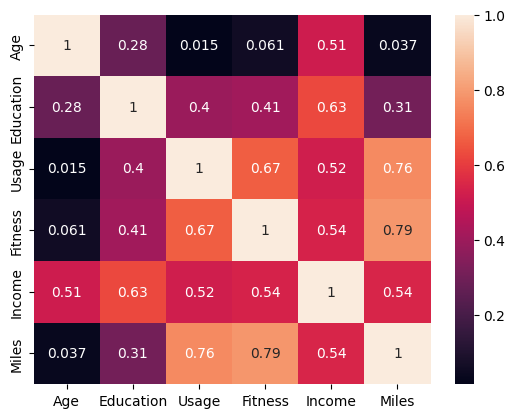

In [ ]:
Z=sns.heatmap(customer[['Age','Education','Usage','Fitness','Income','Miles']].corr(), annot=True)

# Insights:
Correlation only measures the strength and direction of the linear relationship between variables:This process more helpful to decision-making.
1. positive correlation coefficients close to 1 indicate a strong positive relationship:'Usage' and 'Miles' have a correlation coefficient of 0.759,Fitness' and 'Miles' have a correlation coefficient of 0.786, indicating a strong positive correlation
2. correlation coefficients between 0.3 and 0.7 indicate a moderate correlation. here,'Education' and 'Income' have a correlation coefficient of 0.626, indicating a moderate positive correlation
3.correlation coefficients close to 0 indicate a weak correlation. For example, 'Age' and 'Usage' have a correlation coefficient of 0.015, indicating a very weak positive correlation.
3.A negative correlation coefficient indicates an inverse relationship between variables. There are no negative correlations in the provided matrix.

# 6a.Customer profiling and recommendation


#6a.detail about Buyers of KP281 product

In [ ]:
s=customer[customer['Product']=='KP281']
s.shape

(80, 9)

There are no missing values in the data.
There are 3 unique products in the dataset.
KP281 is the most frequent product.

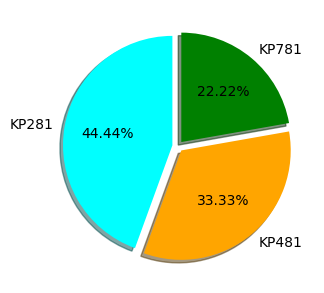

In [ ]:
fig= plt.figure(figsize=(12,5))
a1 = fig.add_subplot(131)
a1.pie(x=customer['Product'].value_counts(),
 startangle=90, shadow=True, explode=[0.05,0.05,0.05],
 autopct='%1.2f%%', colors=['cyan','orange','green'], labels=customer['Product'].value_counts().index)
plt.show()


#Insights:
 It shows that KP281 has the highest marginal probability, indicating that it's the most commonly purchased product among the customers

In [ ]:
A=s.groupby(["MaritalStatus","Gender","Education","Usage"])["Product"].count()
A

MaritalStatus  Gender  Education  Usage
Partnered      Female  14         2        5
                                  3        8
                                  4        1
                       15         2        2
                       16         2        2
                                  3        6
                                  4        2
                                  5        1
               Male    13         3        1
                                  4        1
                       14         2        2
                                  4        2
                       16         2        1
                                  3        7
                                  4        6
                       18         3        1
Single         Female  14         2        2
                                  3        2
                       16         2        2
                                  3        2
                                  4        4
               

#Total number of buyers for KP281

In [ ]:
np.sum(A)

80

# Make customer profilings for each and every product
Hint: We want you to find at * What age, gender, and income group but product
the KP281*

#Concentrate of the product KP281:
 An average earning, average fitness concered, with less usage of treadmills, people are usual customers. Also, people with age greater than 30, prefer KP281.KP281 is the most bought product, with 80 purchases out of 180.

As per the probability numbers, the most probable treadmill to buy is KP281, as it targets people falling in average fitness, income range, and middle age people.t appears that the product "KP281" is popular across different demographic groups and usage patterns. Here's how you can interpret it:

The product "KP281" is purchased by both partnered and single individuals, across different genders.
It is bought by individuals with various education levels.
It is utilized in different ways based on the usage categories.
Given that "KP281" constitutes the majority of sales within the dataset, it suggests that it might be a popular or high-demand product within the market segment captured by this data.

Partnered buyers seems to be the making more purchases(48) compared to Single =32 for KP281
# General review of the All the product
The age range of the buyers seems to be from 18 to 50. Average age of the buyers is approximately 29 years, with standard deviation of approximately 7 years and median in 26 years. It seems to have some outliers impacting the average age.

There are total 8 different categories for Education level, starting from 12 years of education to 21 years of education. Average education level is 16 years (approx) with standard deviation of 1.5 years (approx) and median is too 16 years.

Average Usage hours of buyers seems to have the range from 2 to 7 hours. Average in terms of all the buyers is 3.5 hours (approx) with with standard deviation of 1 hour (approx) and median is 3 hours.

Fitness level is varying in the range of 1-5, with median of 3, and mean of 3.3 with standard deviation of approximately 1.

Income range of buyers are from 30k USD to 104k USD. Average consumer gets an income of 53.8k USD, with standard deviation of 16.5k USD and median of 50.5k USD.

Average miles for all the consumers is 103 miles, with standard deviation of 51 miles and median of 94 miles.


# 6b. General Recommendations on Actionable Insights
A better product with better features such as advanced fitness tracking and estimator, for highly-educated, high income and active customers to increase revenue and profit margin for Aerofit.

KP781 for females, as they are falling behind in numbers for this treadmill. A campaign, encouraging women to take up fitness challenge with the treadmill, will surely make the numbers soar.

KP281 and KP481 bring in significant revenue and is prefered by young individuals, with age < 30 and average fitness level, adding features and discounts could help boost sales for these. Otherwise, bringing other treadmills in similar price range and maximize the market.

Partnered people, especially males, can be targetted with treadmills, as they are the most probable customers.

People with less than 16 years of education, with high fitness level, might be presented with offers for KP781, so that it encourages other group to level up their fitness by buying KP781.

In [ ]:
df = pd.read_csv("aerofit_treadmill case study.csv")
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200
176,KP781,42,Male,18,Single,5,4,89641,200
177,KP781,45,Male,16,Single,5,5,90886,160
178,KP781,47,Male,18,Partnered,4,5,104581,120


In [ ]:
df['random_group']=np.random.choice(['g1','g2','g3'],size=len(df))
df

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,random_group
0,KP281,18,Male,14,Single,3,4,29562,112,g2
1,KP281,19,Male,15,Single,2,3,31836,75,g3
2,KP281,19,Female,14,Partnered,4,3,30699,66,g3
3,KP281,19,Male,12,Single,3,3,32973,85,g1
4,KP281,20,Male,13,Partnered,4,2,35247,47,g1
...,...,...,...,...,...,...,...,...,...,...
175,KP781,40,Male,21,Single,6,5,83416,200,g3
176,KP781,42,Male,18,Single,5,4,89641,200,g1
177,KP781,45,Male,16,Single,5,5,90886,160,g3
178,KP781,47,Male,18,Partnered,4,5,104581,120,g1


In [ ]:
m=df[df['Gender']=='Male']['Income']
f=df[df['Gender']=='Female']['Income']
from scipy.stats import ttest_1samp,ttest_ind
ttest_ind(m,f,alternative='greater')

TtestResult(statistic=2.752488637540257, pvalue=0.003263631548607129, df=178.0)

In [ ]:
ig1=df[df['random_group']=='g1']['Income']
ig2=df[df['random_group']=='g2']['Income']
ig3=df[df['random_group']=='g3']['Income']

from scipy.stats import ttest_1samp,ttest_ind,f_oneway
f_oneway(ig1,ig2,ig3)

F_onewayResult(statistic=1.3513853266600013, pvalue=0.2615391171380858)

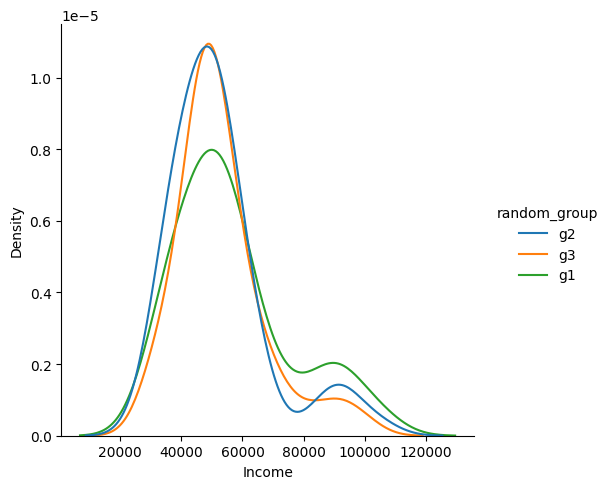

In [ ]:
sns.displot(data=df, x="Income", hue="random_group", kind="kde")

In [ ]:
KP281=df[df['Product']=='KP281']['Income']
KP481=df[df['Product']=='KP481']['Income']
KP781=df[df['Product']=='KP781']['Income']

from scipy.stats import ttest_1samp,ttest_ind,f_oneway
f_oneway(KP281,KP481,KP781)

F_onewayResult(statistic=89.25903546601671, pvalue=1.5644991316342494e-27)

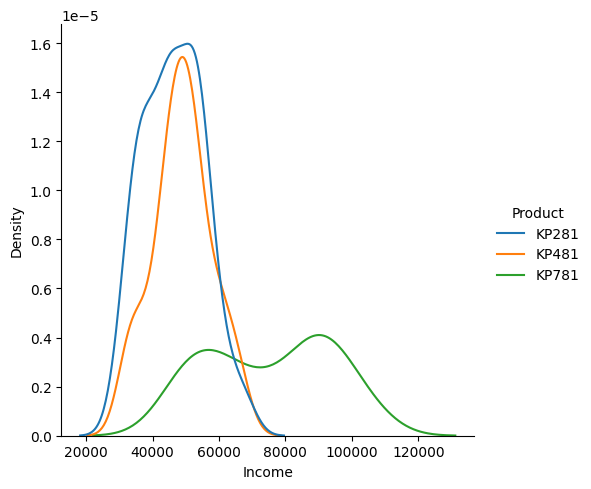

In [ ]:
sns.displot(data=df, x="Income", hue="Product", kind="kde")